<a href="https://www.kaggle.com/code/eniseyerkazan/akbank?scriptVersionId=264124551" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

kütüphaneler

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import time
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

2025-09-26 09:57:58.134921: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758880678.386655      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758880678.464752      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 253 files belonging to 2 classes.
Using 203 files for training.
Found 253 files belonging to 2 classes.
Using 50 files for validation.
Sınıflar: ['no', 'yes']


2025-09-26 09:58:15.336640: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


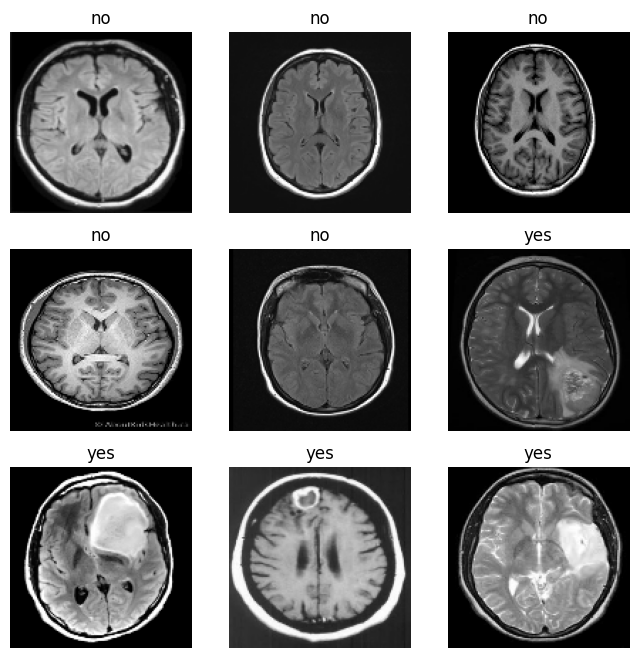

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,699,009 (6.48 MB)

 Trainable params: 1,699,009 (6.48 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 643ms/step - accuracy: 0.6093 - loss: 0.6706 - precision: 0.6243 - recall: 0.8263 - val_accuracy: 0.6800 - val_loss: 0.5713 - val_precision: 0.6809 - val_recall: 0.9697
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 524ms/step - accuracy: 0.6869 - loss: 0.5640 - precision: 0.6960 - recall: 0.8197 - val_accuracy: 0.7200 - val_loss: 0.5324 - val_precision: 0.7209 - val_recall: 0.9394
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 507ms/step - accuracy: 0.7933 - loss: 0.5091 - precision: 0.7636 - recall: 0.9393 - val_accuracy: 0.7800 - val_loss: 0.5099 - val_precision: 0.8667 - val_recall: 0.7879
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 513ms/step - accuracy: 0.8204 - loss: 0.4054 - precision: 0.8254 - recall: 0.8746 - val_accuracy: 0.7600 - val_loss: 0.5142 - val_precision: 0.7692 - val_recall: 0.9091
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 488ms/step - accuracy: 0.8574 - loss: 0.4214 - precision: 0.8488 - recall: 0.9329 - val_accuracy: 0.7800 - val_loss: 0.4988 - val

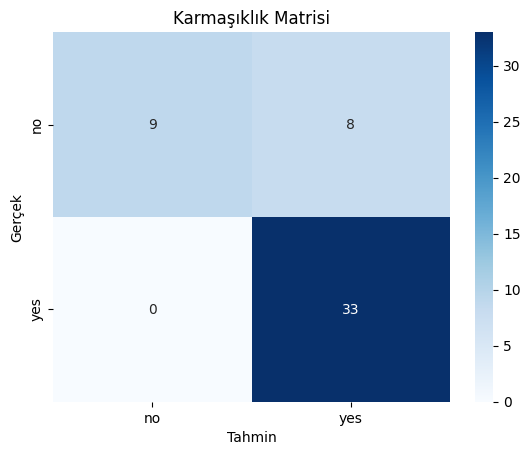

              precision    recall  f1-score   support

          no       1.00      0.53      0.69        17
         yes       0.80      1.00      0.89        33

    accuracy                           0.84        50
   macro avg       0.90      0.76      0.79        50
weighted avg       0.87      0.84      0.82        50



In [2]:


# ------------------------------------------------------------
# 1. Veri Yükleme
# ------------------------------------------------------------
data_dir = "../input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset"

img_size = (128, 128)
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='binary',          # 0 = no, 1 = yes
    batch_size=batch_size,
    image_size=img_size,
    validation_split=0.2,
    subset="training",
    seed=42
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='binary',
    batch_size=batch_size,
    image_size=img_size,
    validation_split=0.2,
    subset="validation",
    seed=42
)

class_names = train_ds.class_names
print("Sınıflar:", class_names)

# Performans için önbellekleme
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(500).prefetch(buffer_size=AUTOTUNE)
val_ds   = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# ------------------------------------------------------------
# 2. Görsel Örnek
# ------------------------------------------------------------
plt.figure(figsize=(8,8))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(labels[i])])
        plt.axis("off")
plt.show()

# ------------------------------------------------------------
# 3. Model
# ------------------------------------------------------------
model = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(128,128,3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')   # binary output
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', keras.metrics.Precision(name='precision'), keras.metrics.Recall(name='recall')]
)

model.summary()

# ------------------------------------------------------------
# 4. Eğitim
# ------------------------------------------------------------
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15
)

# ------------------------------------------------------------
# 5. Sonuç Analizi
# ------------------------------------------------------------
acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
print(f"Son epoch - Eğitim Doğruluğu: {acc:.3f}, Doğrulama Doğruluğu: {val_acc:.3f}")

# Confusion Matrix
y_true = []
y_pred = []
for images, labels in val_ds:
    preds = model.predict(images)
    y_pred.extend((preds > 0.5).astype(int).flatten())
    y_true.extend(labels.numpy().astype(int).flatten())

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Karmaşıklık Matrisi')
plt.ylabel('Gerçek')
plt.xlabel('Tahmin')
plt.show()

print(classification_report(y_true, y_pred, target_names=class_names))


In [3]:


# Kaggle dataset yolu
data_dir = "/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset"

# Sınıfları otomatik bul
classes = [cls for cls in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, cls))]
print("Sınıflar:", classes)

images = []
labels = []

for idx, cls in enumerate(classes):
    cls_folder = os.path.join(data_dir, cls)
    for img_name in os.listdir(cls_folder):
        img_path = os.path.join(cls_folder, img_name)
        # Sadece dosya olanları yükle
        if os.path.isfile(img_path):
            img = load_img(img_path, target_size=(150,150))
            img_array = img_to_array(img)
            images.append(img_array)
            labels.append(idx)

# NumPy dizilerine çevir
x = np.array(images)
y = np.array(labels)

# Eğitim ve test setine ayır
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Normalizasyon
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encoding
num_classes = len(classes)
y_train_categorical = to_categorical(y_train, num_classes)
y_test_categorical = to_categorical(y_test, num_classes)

# Veri artırma
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)
datagen.fit(x_train)

print("Normalize edilmiş eğitim verisi şekli:", x_train.shape)
print("One-hot encoded edilmiş eğitim verisi şekli:", y_train_categorical.shape)


Sınıflar: ['no', 'yes']
Normalize edilmiş eğitim verisi şekli: (202, 150, 150, 3)
One-hot encoded edilmiş eğitim verisi şekli: (202, 2)


In [4]:
def create_cnn_model():
    model=keras.Sequential([
        layers.Conv2D(32,(3,3),activation='relu',padding='same', input_shape=(32,32,3)),
        layers.BatchNormalization(),
        layers.Conv2D(32,(3,3),activation='relu',padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.2),

        layers.Conv2D(64,(3,3),activation='relu',padding='same', input_shape=(32,32,3)),
        layers.BatchNormalization(),
        layers.Conv2D(64,(3,3),activation='relu',padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.3),


        layers.Conv2D(128,(3,3),activation='relu',padding='same', input_shape=(32,32,3)),
        layers.BatchNormalization(),
        layers.Conv2D(128,(3,3),activation='relu',padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.4),

        layers.Flatten(),
        layers.Dense(128,activation='relu'),
        layers.BatchNormalization(),
        layers.Droppout(0.5),
        layers.Dense(10,activation='softmax')
    ])
    return model
    cnn_model=create_cnn_model()
    cnn_model.summary()

In [5]:

def create_cnn_model(input_shape=(150,150,3), num_classes=4):
    model = models.Sequential([
        # 1. Konvolüsyon bloğu
        layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.2),

        # 2. Konvolüsyon bloğu
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.3),

        # 3. Konvolüsyon bloğu
        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.4),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),  # yazım düzeltildi
        layers.Dense(num_classes, activation='softmax')  # sınıf sayısı 4
    ])
    return model

# Modeli oluştur ve özetle
cnn_model = create_cnn_model()
cnn_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 150, 150, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 75, 75, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 37, 37, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 37, 37, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     5,308,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,597,476 (21.35 MB)

 Trainable params: 5,596,772 (21.35 MB)

 Non-trainable params: 704 (2.75 KB)

Sınıflar: ['no', 'yes']


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 719ms/step - accuracy: 0.5648 - loss: 0.7929 - val_accuracy: 0.6471 - val_loss: 0.7032 - learning_rate: 0.0010
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 659ms/step - accuracy: 0.7900 - loss: 0.4825 - val_accuracy: 0.7255 - val_loss: 0.6036 - learning_rate: 0.0010
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 703ms/step - accuracy: 0.7640 - loss: 0.5244 - val_accuracy: 0.7255 - val_loss: 0.7154 - learning_rate: 0.0010
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 658ms/step - accuracy: 0.7560 - loss: 0.4628 - val_accuracy: 0.7843 - val_loss: 0.7104 - learning_rate: 0.0010
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 650ms/step - accuracy: 0.8065 - loss: 0.4285 - val_accuracy: 0.7647 - val_loss: 0.6769 - learning_rate: 0.0010
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 659ms/step - accuracy: 0.8074 - loss: 0.4928 - val_accuracy: 0.7255 - val_loss: 0.6091 - learning_rate: 0.0010
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 748ms/step - accuracy: 0.8179 - loss: 0.4579 - val_accuracy:

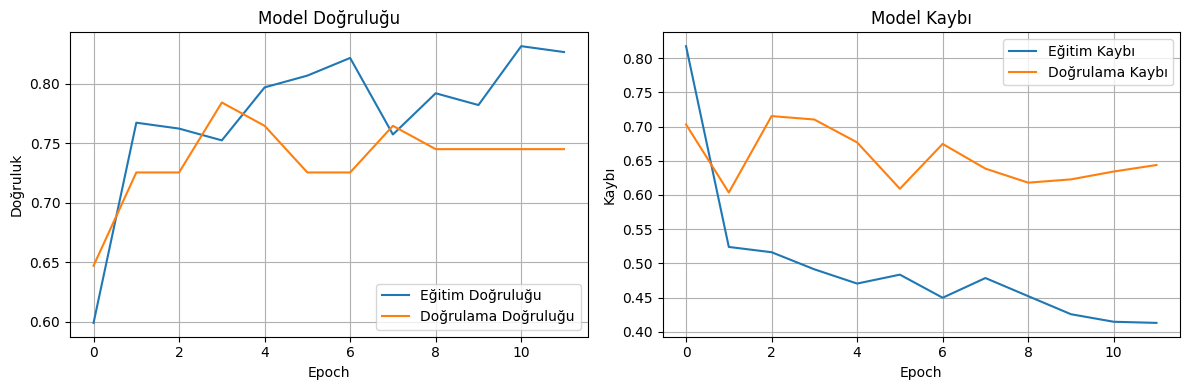

Test Kaybı: 0.6036
Test Doğruluğu: 0.7255
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step

Sınıflandırma Raporu:
              precision    recall  f1-score   support

          no       0.67      0.60      0.63        20
         yes       0.76      0.81      0.78        31

    accuracy                           0.73        51
   macro avg       0.71      0.70      0.71        51
weighted avg       0.72      0.73      0.72        51



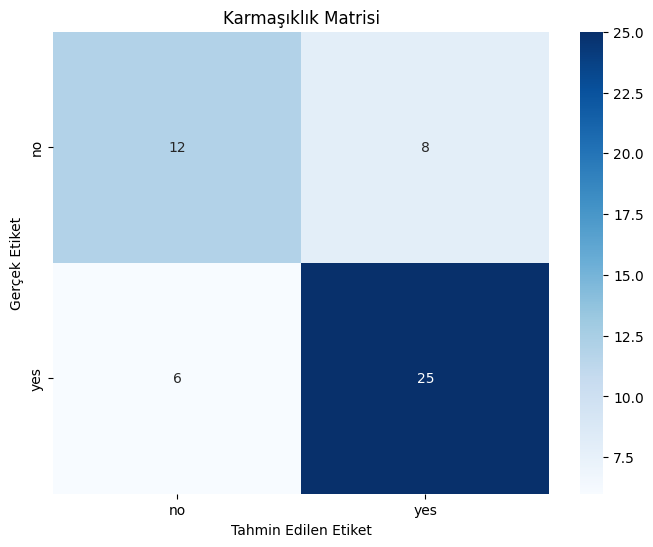

In [6]:


# Dataset yolunu ayarlayın
data_dir = '/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset'

# Sınıf isimlerini al
classes = os.listdir(data_dir)
print("Sınıflar:", classes)

# Görüntüleri ve etiketleri yükle
images = []
labels = []

for idx, cls in enumerate(classes):
    cls_folder = os.path.join(data_dir, cls)
    for img_name in os.listdir(cls_folder):
        img_path = os.path.join(cls_folder, img_name)
        if os.path.isfile(img_path):
            img = load_img(img_path, target_size=(150,150))
            img_array = img_to_array(img)
            images.append(img_array)
            labels.append(idx)

x = np.array(images, dtype='float32') / 255.0
y = np.array(labels)

# Eğitim ve test seti
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# ImageDataGenerator ile augmentasyon
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)
datagen.fit(x_train)

# CNN Modeli oluştur
def create_cnn_model():
    model = models.Sequential([
        layers.Input(shape=(150,150,3)),
        layers.Conv2D(32,(3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64,(3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Binary output
    ])
    return model

cnn_model = create_cnn_model()

# Compile
cnn_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.0001
)

# Modeli eğit
start_time = time.time()
history = cnn_model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=50,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)
training_time = time.time() - start_time
print(f"Eğitim süresi: {training_time:.2f} saniye")

# Eğitim ve doğrulama grafikleri
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Model Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Model Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kaybı')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Test verisini değerlendir
test_loss, test_accuracy = cnn_model.evaluate(x_test, y_test, verbose=0)
print(f"Test Kaybı: {test_loss:.4f}")
print(f"Test Doğruluğu: {test_accuracy:.4f}")

# Tahminler ve sınıflandırma raporu
y_pred = (cnn_model.predict(x_test) > 0.5).astype("int32")
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred, target_names=classes))

# Karmaşıklık matrisi
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.title('Karmaşıklık Matrisi')
plt.ylabel('Gerçek Etiket')
plt.xlabel('Tahmin Edilen Etiket')
plt.show()


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 588ms/step - accuracy: 0.6353 - loss: 0.9660 - val_accuracy: 0.7073 - val_loss: 0.5690
Epoch 2/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 542ms/step - accuracy: 0.7914 - loss: 0.4577 - val_accuracy: 0.7317 - val_loss: 0.5685
Epoch 3/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 534ms/step - accuracy: 0.8494 - loss: 0.4626 - val_accuracy: 0.7561 - val_loss: 0.5373
Epoch 4/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 540ms/step - accuracy: 0.8652 - loss: 0.3513 - val_accuracy: 0.8049 - val_loss: 0.5384
Epoch 5/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 529ms/step - accuracy: 0.8817 - loss: 0.2739 - val_accuracy: 0.8049 - val_loss: 0.5190
Epoch 6/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 529ms/step - accuracy: 0.9074 - loss: 0.2424 - val_accuracy: 0.7805 - val_loss: 0.4942
Epoch 7/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 528ms/step - accuracy: 0.9469 - loss: 0.1399 - val_accuracy: 0.8049 - val_loss: 0.5701
Epoch 8/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 533ms/step - accuracy: 0.9548 - loss: 0.1258 - val_accuracy: 0.8049 - val_loss: 0.5732
Epo

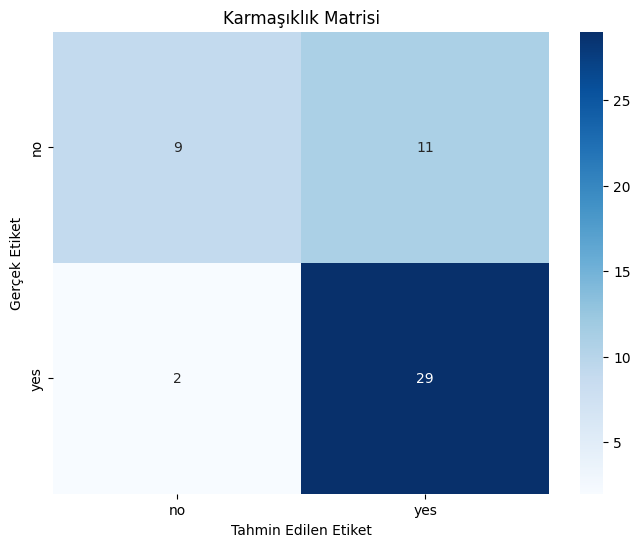

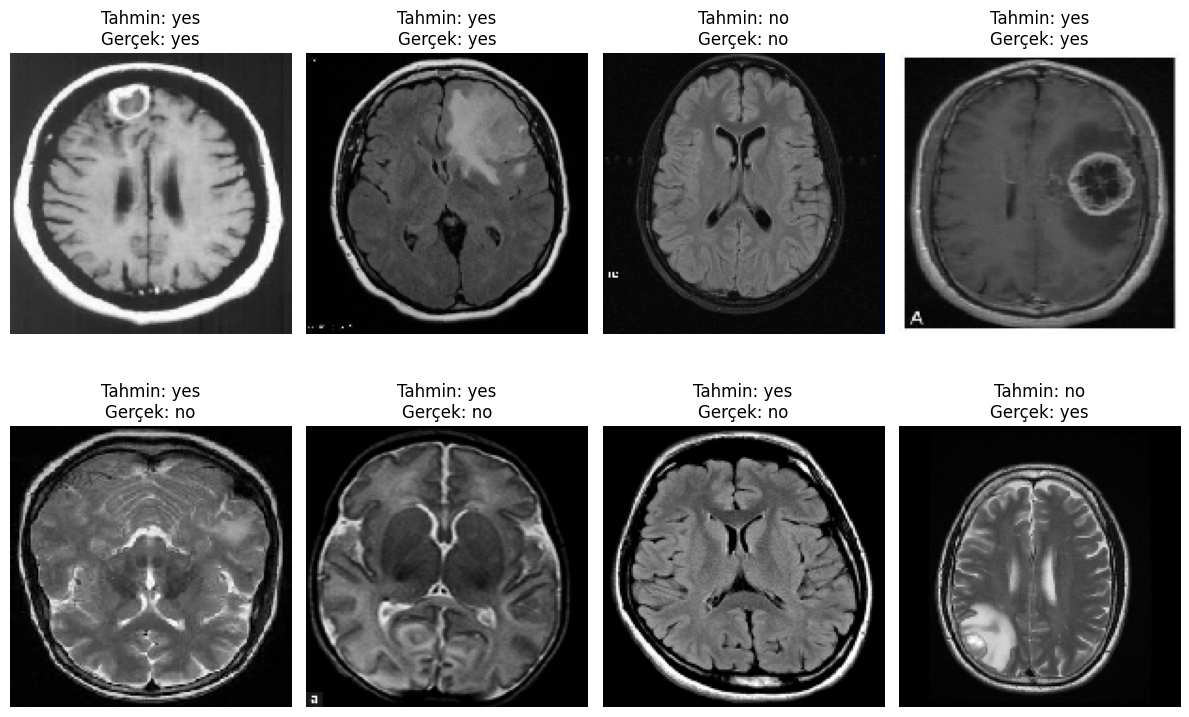

In [7]:


# ---- 1. Veri Yükleme ----
data_dir = "/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset"
classes = ["no", "yes"]
img_size = (150, 150)

images = []
labels = []

for idx, cls in enumerate(classes):
    cls_folder = os.path.join(data_dir, cls)
    for img_name in os.listdir(cls_folder):
        img_path = os.path.join(cls_folder, img_name)
        if os.path.isdir(img_path):  # klasörleri atla
            continue
        img = load_img(img_path, target_size=img_size)
        img_array = img_to_array(img)
        images.append(img_array)
        labels.append(idx)

X = np.array(images, dtype="float32") / 255.0
y = to_categorical(np.array(labels), num_classes=2)

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---- 2. Model ----
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')    # ---- İKİ sınıf ----
])

cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ---- 3. Eğitim ----
cnn_model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=32,
    validation_split=0.2
)

# ---- 4. Test & Değerlendirme ----
test_loss, test_accuracy = cnn_model.evaluate(x_test, y_test, verbose=0)
print(f"Test Kaybı: {test_loss:.4f}")
print(f"Test Doğruluğu: {test_accuracy:.4f}")

# Tahminler
y_pred = cnn_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Sınıflandırma raporu
print("\nSınıflandırma Raporu:")
print(classification_report(y_true, y_pred_classes, target_names=classes))

# Karmaşıklık matrisi
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.title('Karmaşıklık Matrisi')
plt.ylabel('Gerçek Etiket')
plt.xlabel('Tahmin Edilen Etiket')
plt.show()

# ---- 5. Doğru & Yanlış Görselleştirme ----
correct_indices = np.where(y_pred_classes == y_true)[0]
incorrect_indices = np.where(y_pred_classes != y_true)[0]

plt.figure(figsize=(12,8))

for i, idx in enumerate(correct_indices[:4]):
    plt.subplot(2,4,i+1)
    plt.imshow(x_test[idx])
    plt.title(f"Tahmin: {classes[y_pred_classes[idx]]}\nGerçek: {classes[y_true[idx]]}")
    plt.axis('off')

for i, idx in enumerate(incorrect_indices[:4]):
    plt.subplot(2,4,i+5)
    plt.imshow(x_test[idx])
    plt.title(f"Tahmin: {classes[y_pred_classes[idx]]}\nGerçek: {classes[y_true[idx]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()



Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Train shape: (203, 150, 150, 3) (203,)
Test shape : (50, 150, 150, 3) (50,)

Adam optimizer ile eğitim ...
Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 614ms/step - accuracy: 0.5848 - loss: 2.7651 - val_accuracy: 0.3800 - val_loss: 0.7449
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 555ms/step - accuracy: 0.4576 - loss: 0.7076 - val_accuracy: 0.7600 - val_loss: 0.6609
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 572ms/step - accuracy: 0.7718 - loss: 0.6417 - val_accuracy: 0.7400 - val_loss: 0.5557
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 612ms/step - accuracy: 0.7954 - loss: 0.5311 - val_accuracy: 0.7400 - val_loss: 0.5875
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 572ms/step - accuracy: 0.7737 - loss: 0.5369 - val_accuracy: 0.7200 - val_loss: 0.5348
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 554ms/step - accuracy: 0.7992 - loss: 0.5194 - val_accuracy: 0.7600 - val_loss: 0.5503
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 561ms/step - accu

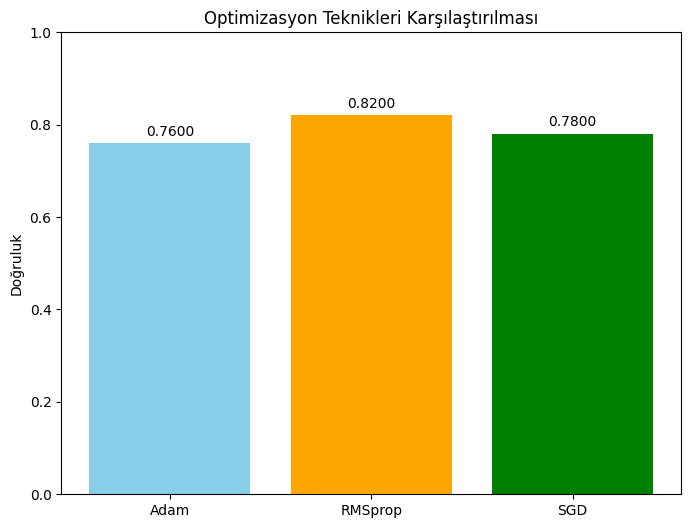

In [8]:

# =======================
# 2. DataLoader
# =======================
base_dir = "/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset"

img_size = (150, 150)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',   # one-hot (2 kolon)
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# =======================
# 3. NumPy Dizilerine Çevir
# =======================
x_train, y_train = next(train_gen)
for _ in range(len(train_gen)-1):
    x_batch, y_batch = next(train_gen)
    x_train = np.concatenate([x_train, x_batch])
    y_train = np.concatenate([y_train, y_batch])

x_test, y_test = next(val_gen)
for _ in range(len(val_gen)-1):
    x_batch, y_batch = next(val_gen)
    x_test = np.concatenate([x_test, x_batch])
    y_test = np.concatenate([y_test, y_batch])

# ---- Etiketleri 0/1'e çevir ----
y_train = np.argmax(y_train, axis=1)
y_test  = np.argmax(y_test, axis=1)

print("Train shape:", x_train.shape, y_train.shape)
print("Test shape :", x_test.shape,  y_test.shape)

# =======================
# 4. CNN Modeli
# =======================
def create_cnn_model():
    model = keras.Sequential([
        layers.Input(shape=(150,150,3)),
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Tek nöron, binary output
    ])
    return model

# =======================
# 5. Farklı Optimizasyonların Karşılaştırılması
# =======================
optimizers = {
    'Adam':    keras.optimizers.Adam(learning_rate=0.001),
    'RMSprop': keras.optimizers.RMSprop(learning_rate=0.001),
    'SGD':     keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
}

results = {}

for opt_name, optimizer in optimizers.items():
    print(f"\n{opt_name} optimizer ile eğitim ...")
    model = create_cnn_model()
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(
        x_train, y_train,
        epochs=10,
        validation_data=(x_test, y_test),
        verbose=1
    )

    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    results[opt_name] = test_acc
    print(f"{opt_name} Test Doğruluğu: {test_acc:.4f}")

# =======================
# 6. Sonuçların Görselleştirilmesi
# =======================
plt.figure(figsize=(8,6))
bars = plt.bar(results.keys(), results.values(), color=['skyblue','orange','green'])
plt.title('Optimizasyon Teknikleri Karşılaştırılması')
plt.ylabel('Doğruluk')
plt.ylim(0,1)
for bar, acc in zip(bars, results.values()):
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height()+0.01,
             f'{acc:.4f}', ha='center', va='bottom')
plt.show()


In [9]:
print("="*50)
print("BEYİN MRI PROJE SONUÇLARI")
print("="*50)
print(f"Temel CNN Model Doğruluğu: {test_accuracy:.4f}")
print(f"En iyi optimizer: {max(results, key=results.get)} "
      f"({max(results.values()):.4f})")
print("="*50)


BEYİN MRI PROJE SONUÇLARI
Temel CNN Model Doğruluğu: 0.7451
En iyi optimizer: RMSprop (0.8200)
